In [1]:
import cPickle
import gzip
import numpy as np

data_file = gzip.open('mnist.pkl.gz','rb')
train, test, validation = cPickle.load(data_file)

train_features = train[0]
train_labels = train[1]

test_features = test[0]
test_labels = test[1]

validation_features = validation[0]
validation_labels = validation[1]

usps_file = gzip.open('usps_data.pkl.gz','rb')
usps_features,usps_labels = cPickle.load(usps_file)

print "Data Loaded"

Data Loaded


In [2]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, X, Y, alpha, regularizer=0.001):
        self.X = X
        self.Y = Y
        self.regularizer = regularizer
        self.__oneHotEncode()
        self.__initializeWeights()
        self.alpha = alpha
    
    def __oneHotEncode(self):
        encoded_Y = np.zeros((self.Y.size, self.Y.max()+1), dtype=self.Y.dtype)
        encoded_Y[np.arange(self.Y.size), self.Y] = 1
        self.Y = encoded_Y
    
    def __initializeWeights(self):
        np.random.seed(0)
        self.W = np.zeros((self.Y.shape[1], self.X.shape[1]))
        #self.W = np.random.randn(self.Y.shape[1], self.X.shape[1]) / np.sqrt(self.Y.shape[1])
    
    def __cost(self, hypothesis_result):
        num_samples = self.X.shape[0]
        term_one = -1.0 * np.sum(self.Y*np.log(hypothesis_result)) / num_samples
        return term_one + ((self.regularizer/2) * np.sum(self.W * self.W)) 
    
    def __gradient(self, hypothesis_result):
        num_samples = self.X.shape[0]
        term_one = self.Y - hypothesis_result
        term_two = -1.0 * term_one.T.dot(self.X) / num_samples
        return term_two + (self.regularizer * self.W)
    
    def __hypothesis(self):
        product = self.X.dot(self.W.T)
        numerator = np.exp(product)
        denominator = np.sum(numerator,axis=1).reshape(numerator.shape[0],1)
        return numerator / denominator
    
    def fit(self, max_steps=250, return_cost_progress=False):
        if return_cost_progress:
            cost_progress = np.zeros((max_steps, 2))
        step_counter = 0
        while step_counter < max_steps:
            hypothesis_result = self.__hypothesis()
            self.W = self.W - self.alpha * self.__gradient(hypothesis_result)
            if return_cost_progress:
                cost_progress[step_counter][0] = step_counter
                cost_progress[step_counter][1] = self.__cost(hypothesis_result)
            if step_counter % 250 == 0:
                print "Step: ", step_counter
            step_counter += 1
        if return_cost_progress:
            return cost_progress
        else:
            return
    
    def predict(self, X_test):
        if X_test.shape[1] != self.X.shape[1]:
            print "Number of features in test data and training data do not match!"
            raise
        return np.argmax(X_test.dot(self.W.T), axis=1)
    
    def error(self, Y_pred, Y_actual):
        num_wrong = Y_pred[Y_pred != Y_actual].size
        num_total = Y_pred.size
        return 1.0*num_wrong / num_total
    
    def accuracy(self, Y_pred, Y_actual):
        num_right = Y_pred[Y_pred == Y_actual].size
        num_total = Y_pred.size
        return 1.0*num_right / num_total


Step:  0
Step:  250
Step:  500
Step:  750
Step:  1000
Step:  1250
Step:  1500
Step:  1750
Done in  1335.937 s
Test Error:  0.0753
Test Accuracy:  0.9247
Validation Error:  0.0789
Validation Accuracy:  0.9211
USPS Error:  0.418170908545
USPS Accuracy:  0.581829091455


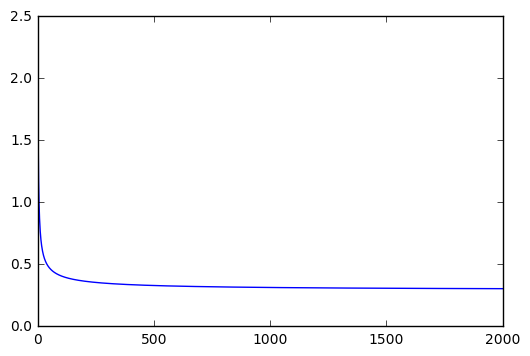

In [3]:
from time import time

logistic = LogisticRegression(train_features, train_labels, 0.5,0.0003)
tt = time()
cost_progress = logistic.fit(2000, return_cost_progress=True)
print "Done in ",round(time()-tt, 3),"s"

test_pred_labels = logistic.predict(test_features)
test_err = logistic.error(test_pred_labels, test_labels)
test_acc = logistic.accuracy(test_pred_labels, test_labels)
print "Test Error: ",test_err
print "Test Accuracy: ",test_acc

validation_pred_labels = logistic.predict(validation_features)
validation_err = logistic.error(validation_pred_labels, validation_labels)
validation_acc = logistic.accuracy(validation_pred_labels, validation_labels)
print "Validation Error: ",validation_err
print "Validation Accuracy: ",validation_acc

usps_pred_labels = logistic.predict(usps_features)
usps_err = logistic.error(usps_pred_labels, usps_labels)
usps_acc = logistic.accuracy(usps_pred_labels, usps_labels)
print "USPS Error: ",usps_err
print "USPS Accuracy: ",usps_acc

%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(cost_progress[:,0], cost_progress[:,1])